# BMI Dataset

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("BMI.csv")
data.head()

,Gender,Height,Weight,Final_Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
data.shape

(500, 4)

In [4]:
data['Gender'].value_counts()

Gender
Female    255
Male      245
Name: count, dtype: int64

<Axes: >

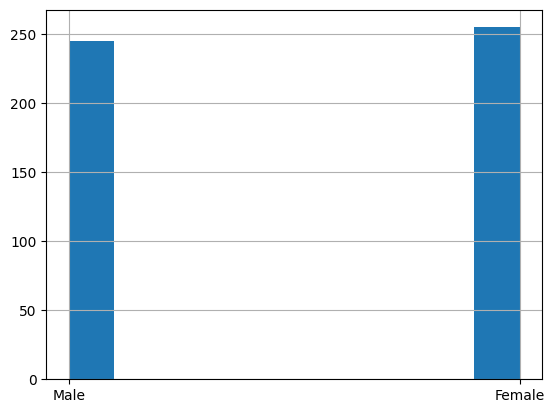

In [5]:
data.Gender.hist()

In [7]:
data.isnull().sum()

Gender         0
Height         0
Weight         0
Final_Index    0
dtype: int64

In [8]:
data.describe(include='all')

,Gender,Height,Weight,Final_Index
count,500,500.000000,500.000000,500.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,255,NaN,NaN,NaN
mean,NaN,169.944000,106.000000,3.748000
std,NaN,16.375261,32.382607,1.355053
min,NaN,140.000000,50.000000,0.000000
25%,NaN,156.000000,80.000000,3.000000
50%,NaN,170.500000,106.000000,4.000000
75%,NaN,184.000000,136.000000,5.000000


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating dummies for gender
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

# Independent variable set
X = data[['Gender', 'Height', 'Weight']]

# VIF Dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# Calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

  feature        VIF
0  Gender   2.028864
1  Height  11.623103
2  Weight  10.688377


In [10]:
data['Height_m'] = data['Height'] / 100 # Convert cm to meters
data['BMI'] = data['Weight'] / (data['Height_m'] ** 2)

In [11]:
data.head()

,Gender,Height,Weight,Final_Index,Height_m,BMI
0,0,174,96,4,1.74,31.708284
1,0,189,87,2,1.89,24.355421
2,1,185,110,4,1.85,32.140248
3,1,195,104,3,1.95,27.350427
4,0,149,61,3,1.49,27.476240


In [12]:
data.drop(columns=['Height', 'Weight', 'Height_m'], inplace=True)

In [13]:
data.head()

,Gender,Final_Index,BMI
0,0,4,31.708284
1,0,2,24.355421
2,1,4,32.140248
3,1,3,27.350427
4,0,3,27.476240


In [14]:
# Independent variable set
X = data[['Gender', 'BMI']]

# VIF Dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# Calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

  feature      VIF
0  Gender  1.78564
1     BMI  1.78564


In [15]:
X = data[['Gender', 'BMI']]
Y = data['Final_Index']

In [17]:
X.shape

(500, 2)

In [18]:
Y.shape

(500,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [21]:
# Slope And Intercept

print("Estmated model slope:", mlr.coef_)
print("Estmated model intercept:", mlr.intercept_)
list(zip(X, mlr.coef_))

Estmated model slope: [-0.05930358  0.08613564]
Estmated model intercept: 0.5336973683207185


[('Gender', -0.05930358302248001), ('BMI', 0.08613564251375491)]

In [22]:
Y_pred = mlr.predict(X_test)

In [23]:
mlr_diff = pd.DataFrame({'Actual value':Y_test,'Predicted value': Y_pred})
mlr_diff.head()

,Actual value,Predicted value
361,4,3.956394
73,2,2.527578
374,4,3.236461
155,4,3.243337
104,4,3.745604


In [31]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(Y_test, Y_pred)
meanSqErr = metrics.mean_squared_error(Y_test, Y_pred)
rootMeanSqErr = metrics.root_mean_squared_error(Y_test, Y_pred)
print('R squared: {:.2f}'.format(mlr.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Squared Error:', meanSqErr)
print('Root Mean Absolute Error:', rootMeanSqErr)


R squared: 72.72
Mean Absolute Error: 0.5795644457902391
Mean Squared Error: 0.5265655952746275
Root Mean Absolute Error: 0.725648396452874


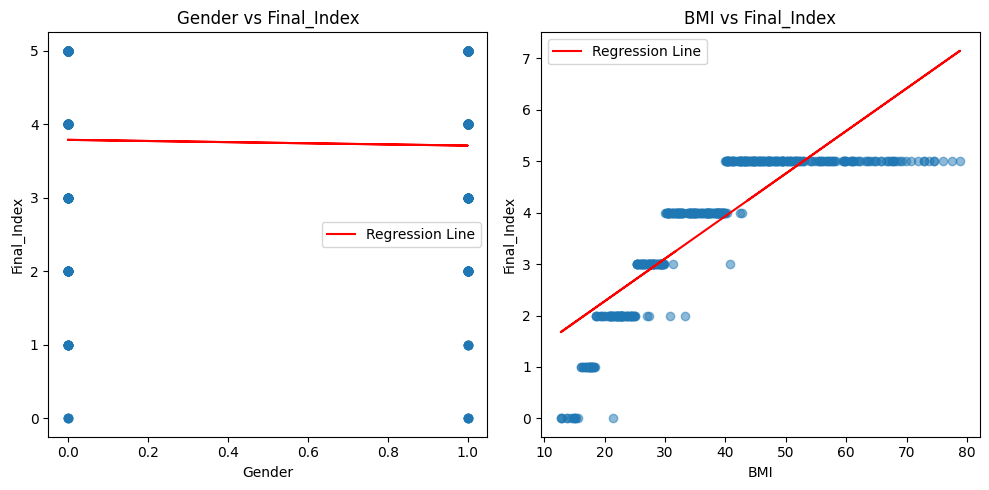

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

def plot_scatter_with_regression(ax, x_data, y_data, x_label, title):
    ax.scatter(x_data, y_data, alpha=0.5)
    
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regression_line = slope * x_data + intercept
    
    ax.plot(x_data, regression_line, color='red', label='Regression Line')
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Final_Index')
    ax.legend()
    
plot_scatter_with_regression(axes[0], data['Gender'], data['Final_Index'], 'Gender', 'Gender vs Final_Index')

plot_scatter_with_regression(axes[1], data['BMI'], data['Final_Index'], 'BMI', 'BMI vs Final_Index')


plt.tight_layout()
plt.show()